In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Konfigurasi visualisasi
sns.set(style="whitegrid")

# Memuat dataset
file_path = "/content/data.csv"
data = pd.read_csv(file_path)

In [3]:
# Menampilkan 5 baris pertama untuk melihat struktur data
print("Data Overview:")
print(data.head())

Data Overview:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Co

In [4]:
# Menampilkan informasi umum tentang dataset
print("\nInfo Dataset:")
data.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: floa

In [5]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.0000

In [6]:
# 1. Cek nilai kosong (missing values)
print("\nCek Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)


Cek Missing Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


Kita memeriksa apakah ada nilai kosong (missing) di dataset dengan isnull().sum().
Visualisasi heatmap digunakan untuk menyoroti lokasi nilai kosong secara grafis, mempermudah identifikasi pola missing values.

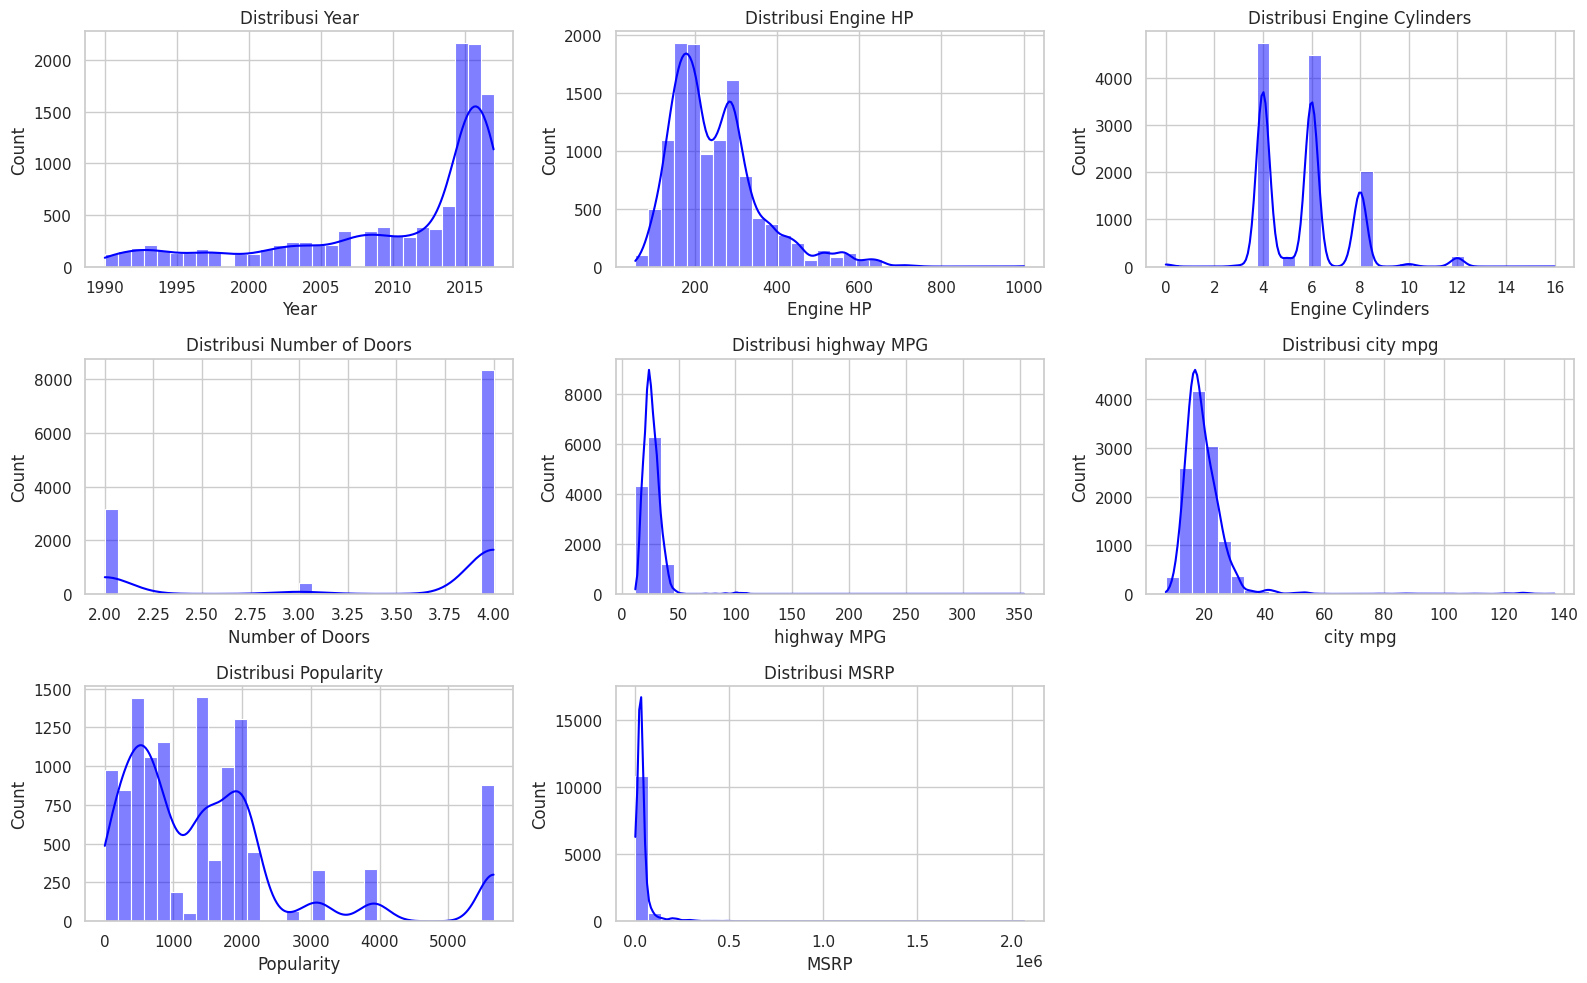

In [7]:
# 2. Distribusi data numerik
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color="blue", bins=30)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

Histogram dibuat untuk setiap kolom numerik untuk memahami distribusi data.

Apakah data simetris, condong ke kiri/kanan, atau terdapat puncak ganda.
Visualisasi ini membantu mendeteksi anomali atau pola tertentu pada data numerik.

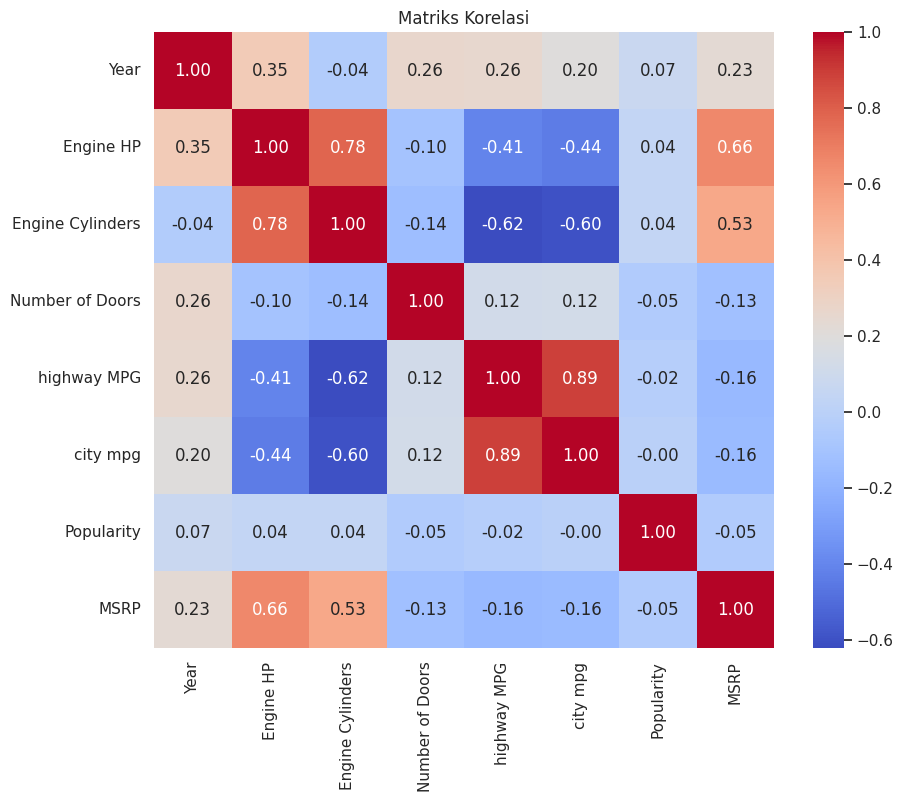

In [9]:
# 3. Analisis korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
# Memastikan hanya kolom numerik yang digunakan untuk korelasi
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Pada langkah ini, kita menganalisis korelasi antara variabel numerik dalam dataset. Korelasi mengukur hubungan linier antara dua variabel numerik, dengan nilai berkisar dari -1 hingga 1:

Nilai positif menunjukkan hubungan langsung (jika satu meningkat, yang lain juga meningkat).

Nilai negatif menunjukkan hubungan terbalik (jika satu meningkat, yang lain menurun).

Nilai mendekati nol menunjukkan tidak ada hubungan linier.

<ipython-input-10-eb60b092d6e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
<ipython-input-10-eb60b092d6e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
<ipython-input-10-eb60b092d6e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
<ipython-input-10-eb60b092d6e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

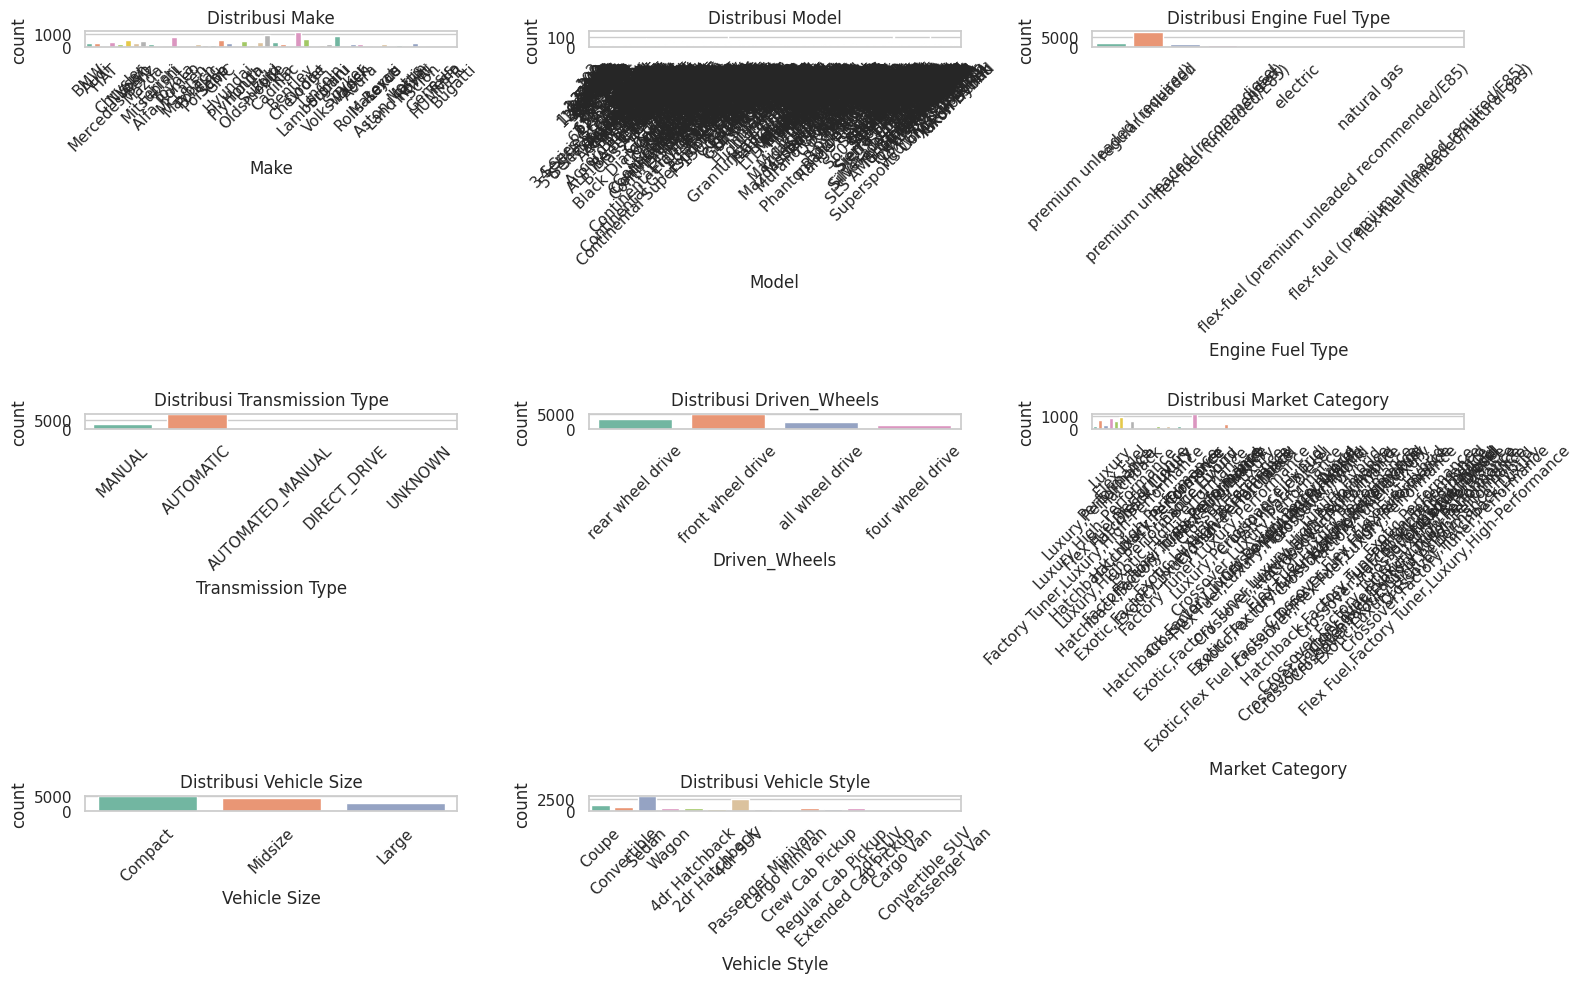

In [10]:
# 4. Analisis data kategorikal
categorical_columns = data.select_dtypes(include=["object"]).columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribusi data untuk setiap kolom kategorikal ditampilkan menggunakan grafik batang (count plot).
Grafik ini menunjukkan jumlah kemunculan setiap kategori, membantu memahami distribusi variabel seperti jenis kelamin, kategori produk, dll.

<ipython-input-11-d9a2b95d5e28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="cool")
<ipython-input-11-d9a2b95d5e28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="cool")
<ipython-input-11-d9a2b95d5e28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="cool")
<ipython-input-11-d9a2b95d5e28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

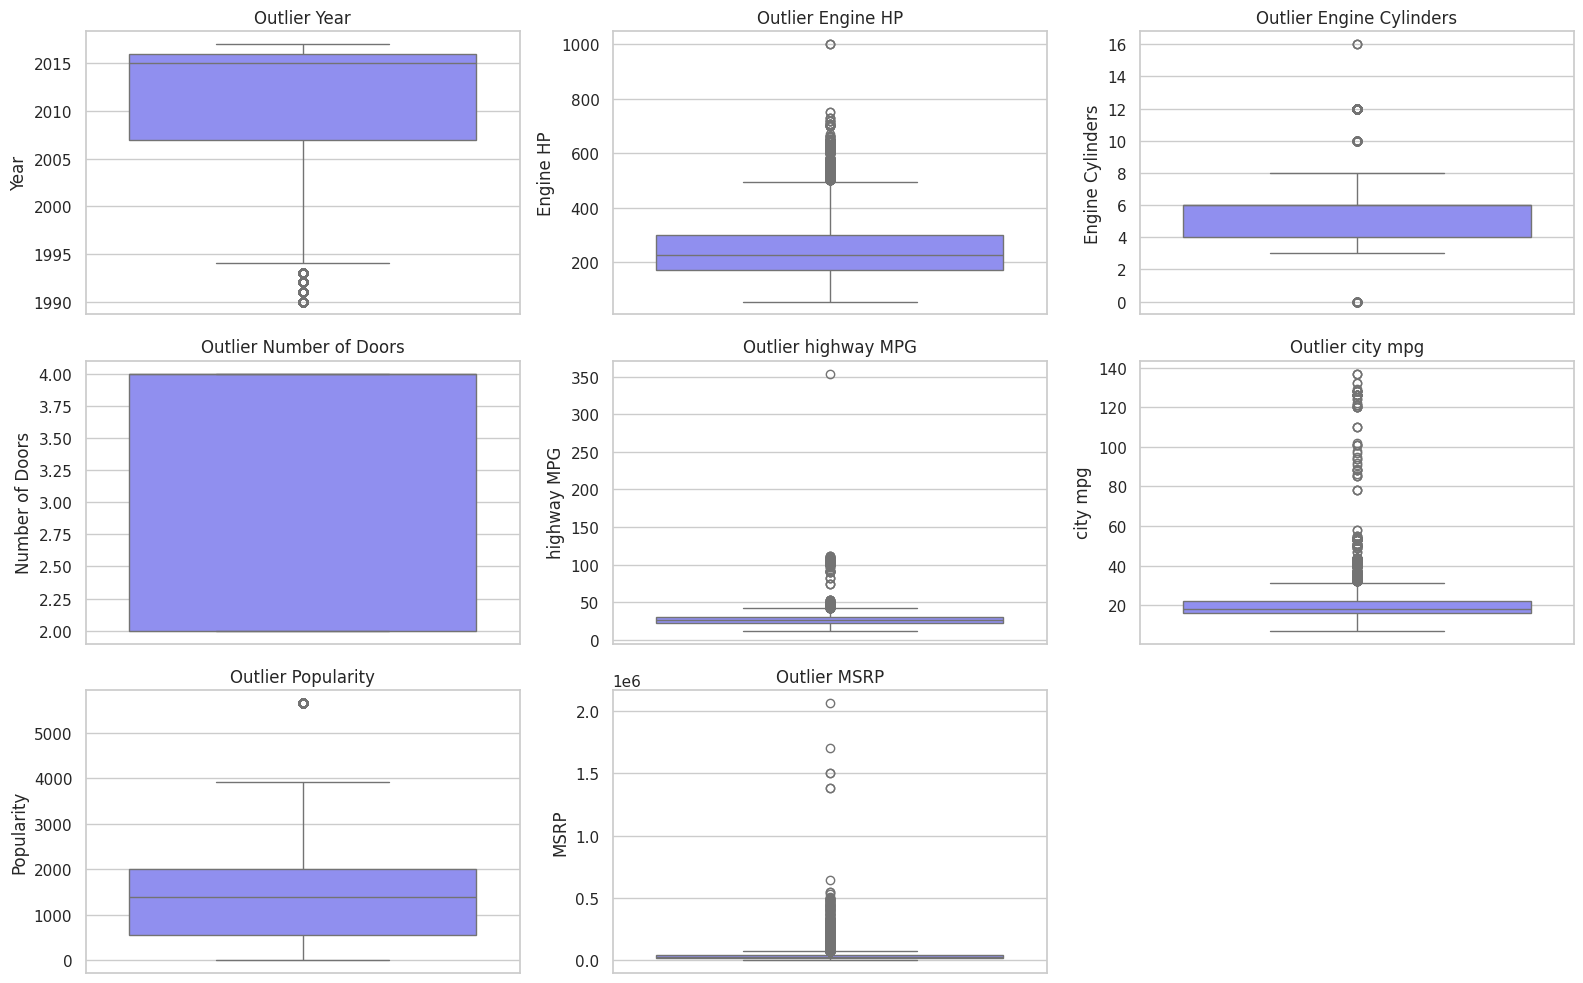

In [11]:
# 5. Analisis outlier dengan boxplot untuk data numerik
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col, palette="cool")
    plt.title(f"Outlier {col}")
plt.tight_layout()
plt.show()

Box plot digunakan untuk mendeteksi outlier pada variabel numerik.

Outlier biasanya terlihat sebagai titik data yang jauh dari rentang normal.
Deteksi outlier membantu mempersiapkan data untuk model analisis atau prediksi.

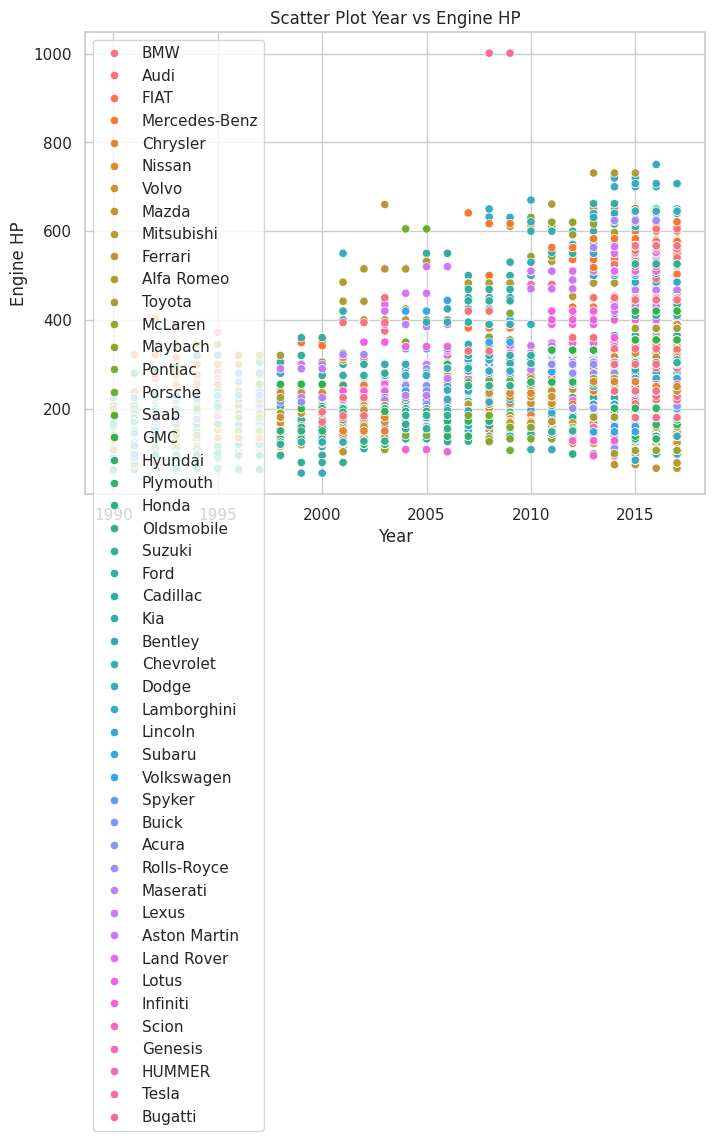

In [12]:
# 6. Contoh hubungan antar variabel (scatter plot)
if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=numerical_columns[0], y=numerical_columns[1], hue=data[categorical_columns[0]])
    plt.title(f"Scatter Plot {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.legend()
    plt.show()
else:
    print("Tidak cukup variabel numerik untuk scatter plot.")

Hubungan antara dua variabel numerik divisualisasikan menggunakan scatter plot.

Dengan menambahkan kategori sebagai parameter hue, kita bisa melihat distribusi kategori pada hubungan tersebut.
Plot ini membantu mendeteksi tren atau pola korelasi